# Coleta de dados
---

[Início](https://colab.research.google.com/drive/1C_ABLsSftrwWAQmMkbRRiKXly5xW-V6y#scrollTo=Klokl0lqA8eD)


> Formação da base de documentos ou Corpus.





## Definições estatísticas

**População**

O tamanho da população alvo que é tratada na 3ª Vice Presidência:


* Aproximadamente **100 mil ementas** do total de cerca de 200 mil.
* Abrangendo 14 orgãos julgadores de **39 orgãos julgadores**.

**Dados rotulados**

(Buscar da base do SAJ)

**Unidade amostral (Granularidade)**

Processo, Acordão, Ementa.

** Técnica de amostragem**

(Qual?)

* Quantidade:
* Período:
* Volume/espaço: GB
* Variância das amostras (exceções)
** (Recursos tem muita semelhança entre eles?)

* Complexidade
* Custo de processamento
* custo de atualização dos dados

**Margem de erro** (Se não for toda a população)

**Ciclo de novas amostras**

A cada semana (???) novas ementas são adicionadas.




## Extração de dados

Os dados foram extraídos da base de acordãos usando um script ([código fonte](https://github.com/piantino/igti-projeto-aplicado/blob/master/2-coleta_dados/coleta-bd.logstash)) em logstash.


```
# Resumo do script de extração
input {
  jdbc {
    (conexão...)
     statement => 
        "select * from ... where ementa is not null"
  }
}
output {
    file { path => "%{+yyyy-MM-dd}_ementa.json" }
}
```



# Domínio do problema

## Download do CVS

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [3]:
# acordao-2018-06-01-csv.zip
file_id = '1W-xQKvtKfFicjo6bu_VAm0XkqEqZctun'

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)

0

## Carregando dados

In [4]:
import pandas as pd

pd.set_option('display.width', 600)
pd.set_option('display.height', 300)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)

colunas = ['ID', 'PROCESSO', 'TIPO', 'RELATOR', 'ORGAO', 'JULGAMENTO', 'FORO', 'VARA', 'COMARCA', 'MOVIMENTACAO', 'EMENTA']
df = pd.read_csv(downloaded, compression='zip', header=0, sep = ',', quotechar='"', names = colunas)

df.drop(columns=['ID', 'RELATOR', 'JULGAMENTO', 'COMARCA', 'MOVIMENTACAO'], inplace=True)

df.head()

,PROCESSO,TIPO,ORGAO,FORO,VARA,EMENTA
0,00005981520148240035,Apelação Cível,Quarta Câmara de Direito Público,Ituporanga,1ª Vara,apelações cíveis. ação de indenização por da...
1,40114881120188240000,Habeas Corpus (Criminal),Quinta Câmara Criminal,São Lourenço do Oeste,Vara Única,habeas corpus. direção de veículo automotor ...
2,00219935920118240038,Apelação / Reexame Necessário,Quarta Câmara de Direito Público,Joinville,1ª Vara da Fazenda Pública,reexame necessário e apelação cível. ação ac...
3,03322813320148240023,Apelação Cível,Quarta Câmara de Direito Público,Capital,3ª Vara da Fazenda Pública,apelação cível. ação anulatória de ato admin...
4,00051352620178240075,Agravo de Execução Penal,Quinta Câmara Criminal,Tubarão,2ª Vara Criminal,recurso de agravo. execução penal (lei 7.210...


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


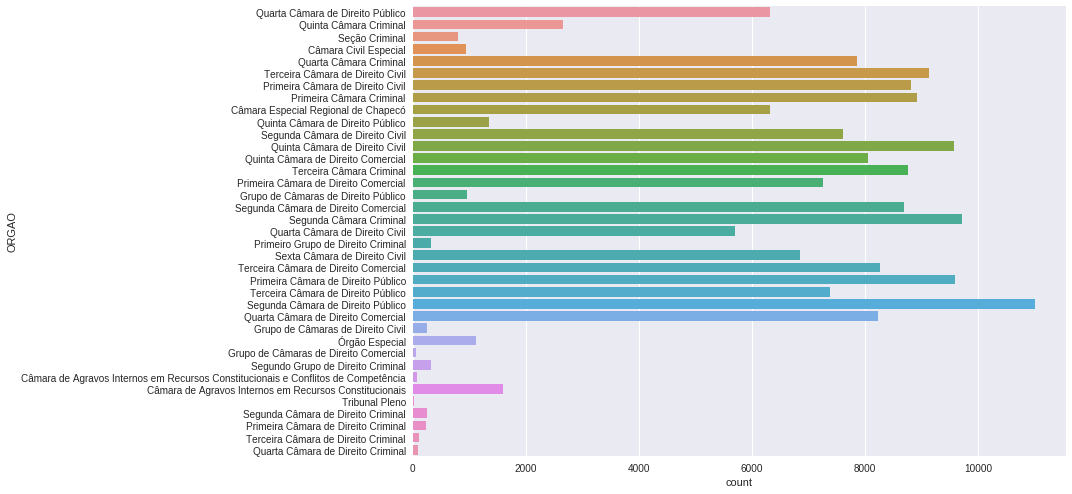

In [6]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

x = sns.countplot(y="ORGAO", data=df)

In [0]:
df2 = df.groupby(['ORGAO', 'TIPO']).ORGAO.unique()
df2.head(20)

ORGAO                                                   TIPO                                           
Câmara Civil Especial                                   Agravo                                                                       [Câmara Civil Especial]
                                                        Agravo Regimental                                                            [Câmara Civil Especial]
                                                        Embargos de Declaração                                                       [Câmara Civil Especial]
Câmara Especial Regional de Chapecó                     Agravo                                                         [Câmara Especial Regional de Chapecó]
                                                        Agravo Regimental                                              [Câmara Especial Regional de Chapecó]
                                                                                                               